In [11]:
import pandas as pd
import numpy as np

In [12]:
data = pd.read_csv("./data/train.csv")
questions = data['cauhoi'].tolist()
answers= data['traloi'].tolist()

In [13]:
# def filter_answers(questions,answers):
#     answers_with_tag= []
#     for i in range(len(answers)):
#         if type(answers[i]) == str:
#             answers_with_tag.append(answers[i])
#         # else:
#         #     questions.pop(i)
#     return answers_with_tag


In [14]:
# filter_answers(questions,answers)

In [15]:
import pandas as pd
# from gensim.models import Word2Vec
import re
import numpy as np 
import tensorflow as tf
import pickle
from tensorflow.keras import layers, activations, models, preprocessing, utils
data = pd.read_csv("./data/train.csv")
questions = data["cauhoi"].tolist()
answers = data["traloi"].tolist()
answers_with_tags = list()
#lấy ra từ điển
for i in range( len( answers ) ):
    if type( answers[i] ) == str:
        answers_with_tags.append( answers[i] )
    else:
        questions.pop( i )
answers = list()

#gan nhan 
for i in range( len( answers_with_tags ) ) :
    answers.append( '<START> ' + answers_with_tags[i] + ' <END>' )

tokenizer = preprocessing.text.Tokenizer()
tokenizer.fit_on_texts( questions + answers )
VOCAB_SIZE = len( tokenizer.word_index ) + 1
print( 'Số lượng từ trong từ điển: {}'.format( VOCAB_SIZE ))

#trích thành các từ xl các kí tự đặc biệt
vocab = []
for word in tokenizer.word_index:
  vocab.append(word)

# def tokenize(sentences):
#   tokens_list = []
#   vocabulary = []
#   for sentence in sentences:
#     sentence = sentence.lower()
# #     sentence = re.sub('[^a-zA-Z]', ' ', sentence)
#     tokens = sentence.split()
#     vocabulary += tokens
#     tokens_list.append(tokens)
#   return tokens_list, vocabulary

Số lượng từ trong từ điển: 1088


In [16]:
vocab

['có',
 'start',
 'end',
 'laptop',
 'giá',
 'ạ',
 'sản',
 'phẩm',
 'không',
 'được',
 'bao',
 'nhiêu',
 'tại',
 'là',
 'shop',
 'của',
 'hiện',
 '128gb',
 'bị',
 'trang',
 'bản',
 'đang',
 'mình',
 'gaming',
 'hàng',
 '000đ',
 'về',
 'asus',
 'ram',
 'phiên',
 '256gb',
 'lenovo',
 '5g',
 'samsung',
 'msi',
 'galaxy',
 'dạ',
 'khách',
 'quý',
 'bên',
 '15',
 '8',
 'acer',
 '14',
 '8gb',
 '1',
 'pro',
 'gb',
 'bán',
 'ổ',
 'cứng',
 'inch',
 'hệ',
 'kinh',
 'doanh',
 'này',
 'khi',
 'còn',
 'khoảng',
 'chip',
 'hình',
 'hp',
 'intel',
 'nào',
 'iphone',
 'hỗ',
 'trợ',
 'màn',
 '3',
 '990',
 '16',
 'tôi',
 'vivobook',
 'macbook',
 'ideapad',
 '64gb',
 '4gb',
 'oppo',
 'card',
 'dung',
 'lượng',
 'điện',
 'cho',
 'ssd',
 'và',
 '13',
 'lòng',
 'xin',
 'thoại',
 'cả',
 'vui',
 'lỗi',
 'tất',
 'xiaomi',
 'hãng',
 '6',
 'thanh',
 'mhz',
 'mua',
 'khác',
 'ddr4',
 'với',
 'core',
 'các',
 'để',
 'modern',
 'mức',
 'graphics',
 '490',
 'thống',
 'cần',
 '3200',
 'trong',
 'mãi',
 'chi',
 'khuyế

In [17]:
X= data.drop(['traloi'],axis=1)
Y= data['traloi']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
#encoder_input_data mã hóa câu hỏi thành vector số(one hot vector)
tokenized_questions = tokenizer.texts_to_sequences( questions )
maxlen_questions = max( [len(x) for x in tokenized_questions ] )
padded_questions = preprocessing.sequence.pad_sequences( tokenized_questions, maxlen = maxlen_questions, padding = 'post')
encoder_input_data = np.array(padded_questions)
# print("Encoder_input_data",encoder_input_data.shape, maxlen_questions)
# print(questions[0])
# print(encoder_input_data[0])

# decoder_input_data mã hóa câu trả lời thành vector số
tokenized_answers = tokenizer.texts_to_sequences( answers )
maxlen_answers = max( [ len(x) for x in tokenized_answers ] )
padded_answers = preprocessing.sequence.pad_sequences( tokenized_answers , maxlen=maxlen_answers , padding='post' )
decoder_input_data = np.array( padded_answers )
# print(  )
# print("Decoder_input_data",decoder_input_data.shape , maxlen_answers)
# print(answers[0])
# print(decoder_input_data[0])

# decoder_output_data giải mã từ vector số sang string
tokenized_answers = tokenizer.texts_to_sequences( answers )
for i in range(len(tokenized_answers)) :
    tokenized_answers[i] = tokenized_answers[i][1:]
padded_answers = preprocessing.sequence.pad_sequences( tokenized_answers , maxlen=maxlen_answers , padding='post' )
onehot_answers = utils.to_categorical( padded_answers , VOCAB_SIZE )
decoder_output_data = np.array( onehot_answers )

In [20]:
encoder_input_train, encoder_input_val, decoder_input_train, decoder_input_val, decoder_output_train, decoder_output_val = train_test_split(
    encoder_input_data, decoder_input_data, decoder_output_data, test_size=0.2, random_state=42)

In [21]:
latent_dims = 300
embedding_dims= 200
dropout = 0.2

word2vec



In [22]:
encoder_inputs = tf.keras.layers.Input(shape=(maxlen_questions,))
encoder_embedding = tf.keras.layers.Embedding(VOCAB_SIZE,embedding_dims,trainable=True,mask_zero=True)(encoder_inputs)
encoder_lstm1= tf.keras.layers.LSTM(latent_dims,dropout= dropout  ,return_sequences=True,return_state=True)
encoder_output1, state_h1,state_c1= encoder_lstm1(encoder_embedding)

encoder_lstm2= tf.keras.layers.LSTM(latent_dims,dropout=dropout  ,return_sequences=True,return_state=True)
encoder_output2, state_h2, state_c2= encoder_lstm2(encoder_output1)

encoder_lstm3= tf.keras.layers.LSTM(latent_dims,dropout=dropout  , return_sequences=True,return_state=True)
encoder_outputs, state_h, state_c =  encoder_lstm3(encoder_output2)
encoder_states = [ state_h , state_c ]

decoder_inputs = tf.keras.layers.Input(shape=(maxlen_answers,))
decoder_embedding= tf.keras.layers.Embedding(VOCAB_SIZE,200,trainable=True,mask_zero=True)(decoder_inputs)

decoder_lstm = tf.keras.layers.LSTM(300,dropout=0.2,return_sequences=True,return_state=True)
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(decoder_embedding,initial_state=[state_h, state_c])

decoder_dense =  tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(VOCAB_SIZE, activation='softmax'))
outputs = decoder_dense(decoder_outputs)

model = tf.keras.models.Model([encoder_inputs, decoder_inputs], outputs)
model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='categorical_crossentropy')

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 30)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 30, 200)      217600      ['input_1[0][0]']                
                                                                                                  
 lstm (LSTM)                    [(None, 30, 300),    601200      ['embedding[0][0]']              
                                 (None, 300),                                                     
                                 (None, 300)]                                                     
                                                                                              

In [23]:
# model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

In [24]:

# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)

In [25]:
history=model.fit([encoder_input_train, decoder_input_train], decoder_output_train, 
          validation_data=([encoder_input_val, decoder_input_val], decoder_output_val), 
          epochs=3, batch_size=8)

Epoch 1/3
335/335 [==============================] - 26s 42ms/step - loss: 0.8937 - val_loss: 0.4285
Epoch 2/3
335/335 [==============================] - 10s 31ms/step - loss: 0.3355 - val_loss: 0.2595
Epoch 3/3
335/335 [==============================] - 39s 117ms/step - loss: 0.2421 - val_loss: 0.2167


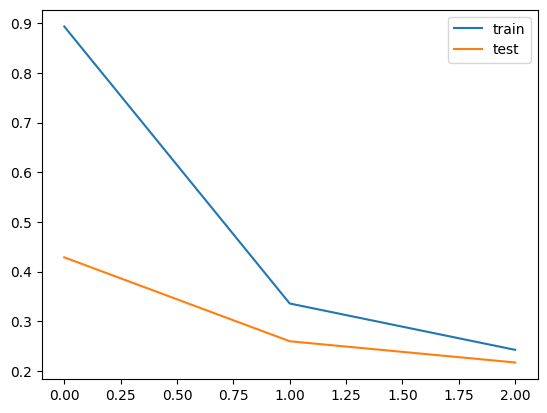

In [26]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [27]:
def make_inference_models():
    encoder_model= tf.keras.models.Model(inputs=encoder_inputs,outputs= encoder_states)

    decoder_state_input_h= tf.keras.layers.Input(shape=(latent_dims,))
    decoder_state_input_c= tf.keras.layers.Input(shape=(latent_dims,))

    decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
    decoder_outputs, state_h, state_c = decoder_lstm(decoder_embedding , initial_state=decoder_states_inputs)
    decoder_states = [state_h, state_c]
    decoder_outputs = decoder_dense(decoder_outputs)
    decoder_model = tf.keras.models.Model([decoder_inputs] + decoder_states_inputs,
                                            [decoder_outputs] + decoder_states)
    return encoder_model , decoder_model


In [28]:
def str_to_tokens( sentence : str ):

    words = sentence.lower().split()
    tokens_list = list()
  
    for word in words:
        try:
            tokens_list.append( tokenizer.word_index[ word ] )
        except:
            tokens_list.append(tokenizer.word_index[ 'khách' ])
            print(word)
    
    return preprocessing.sequence.pad_sequences( [tokens_list] , maxlen=maxlen_questions , padding='post')

In [29]:
enc_model , dec_model = make_inference_models()

In [30]:
enc_model

In [31]:
dec_model

In [66]:
def chat_bot_lstm(cau_hoi):
    states_values = enc_model.predict(str_to_tokens(cau_hoi))
    
    print(len(states_values))
    empty_target_seq = np.zeros(( 1,1))
    empty_target_seq[0, 0] = tokenizer.word_index['start']
    stop_condition = False
    decoded_translation = ''
    while not stop_condition :
        dec_outputs , h , c = dec_model.predict([ empty_target_seq ] + states_values ) #start + giá trị hiện thờii
        sampled_word_index = np.argmax( dec_outputs[0, -1, :] )
        sampled_word = None
        for word , index in tokenizer.word_index.items() :
            if sampled_word_index == index :
                decoded_translation += ' {}'.format( word )
                print(sampled_word_index)
                sampled_word = word
        if sampled_word == 'end' or len(decoded_translation.split()) > maxlen_answers:
            stop_condition = True
        empty_target_seq = np.zeros( ( 1 , 1 ) )  
        empty_target_seq[ 0 , 0 ] = sampled_word_index
        states_values = [ h , c ] 
    return ( decoded_translation[1:-4])

In [67]:
print(chat_bot_lstm("sản phẩm A54"))

1/1 [==============================] - 0s 64ms/step
2
1/1 [==============================] - 0s 55ms/step
17
1/1 [==============================] - 0s 75ms/step
13
1/1 [==============================] - 0s 47ms/step
15
1/1 [==============================] - 0s 75ms/step
23
1/1 [==============================] - 0s 51ms/step
9
1/1 [==============================] - 0s 52ms/step
54
1/1 [==============================] - 0s 50ms/step
55
1/1 [==============================] - 0s 54ms/step
7
1/1 [==============================] - 0s 72ms/step
8
1/1 [==============================] - 0s 49ms/step
56
1/1 [==============================] - 0s 50ms/step
6
1/1 [==============================] - 0s 53ms/step
3
hiện tại shop mình không kinh doanh sản phẩm này ạ
